## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Mark 4958
# student 2: Idan 1210
# student 3:
# student 4:
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.neighbors import KNeighborsRegressor
#Load train data
file_name="C:\\Users\\USER\\OneDrive\\מסמכים\\GitHub\\House-pricing-prediction\\housing_train (2).csv"
df_train = pd.read_csv(file_name)
df_train.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [5]:
#Load test data
file_name2="C:\\Users\\USER\\OneDrive\\מסמכים\\GitHub\\House-pricing-prediction\\housing_test (2).csv"
df_test = pd.read_csv(file_name2)
df_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


,AveRooms,AveBedrms
0,4.158690,1.032746
1,4.149245,1.179989
2,3.432331,1.022556
3,5.735798,1.053201
4,4.064607,0.962079
...,...,...
16507,7.760599,1.084788
16508,7.306991,1.060790
16509,6.169935,1.013072
16510,4.661972,1.107042


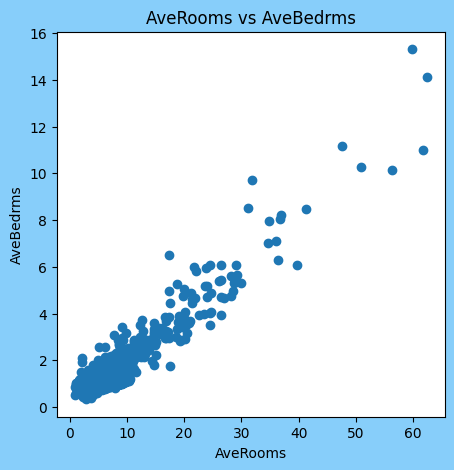

In [6]:
##EDA
##A graph + table comparison
display(df_train[['AveRooms','AveBedrms']])
fig, ax = plt.subplots(figsize=(5, 5),facecolor='lightskyblue') #figure object
ax.scatter(df_train['AveRooms'],df_train['AveBedrms']) #scatter plot
ax.set_xlabel('AveRooms')
ax.set_ylabel('AveBedrms')
ax.set_title('AveRooms vs AveBedrms')
##Since there's a high linear correlation between AveRooms and AveBedrms, we remove AveBedrms from the dataframes
df_train.drop(["AveBedrms"],axis=1,inplace=True)
df_test.drop(['AveBedrms'],axis=1,inplace=True)

,MedInc,MedHouseVal
0,4.0179,3.500
1,2.7002,0.883
2,1.2762,2.536
3,4.9342,1.810
4,2.2755,1.250
...,...,...
16507,6.0000,3.535
16508,11.0138,4.421
16509,5.4675,2.611
16510,1.6932,0.784


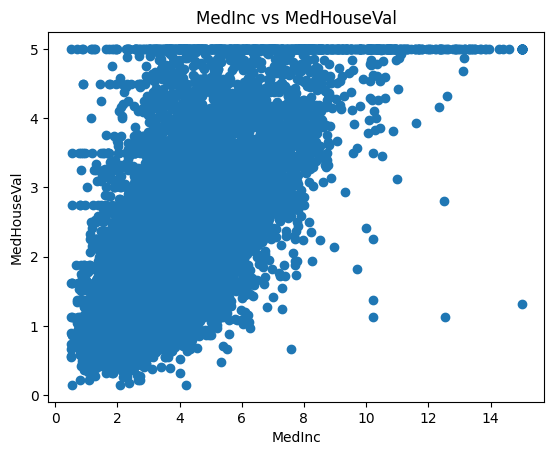

In [7]:
#EDA #2 (same as the one above with different features)
display(df_train[['MedInc','MedHouseVal']])
fig2, ax2 = plt.subplots()
ax2.scatter(df_train['MedInc'],df_train['MedHouseVal'])
ax2.set_xlabel('MedInc')
ax2.set_ylabel('MedHouseVal')
ax2.set_title('MedInc vs MedHouseVal')
plt.show()

In [13]:
##Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Scale the features of the training dataset and create a DataFrame with scaled values
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

# Display the scaled DataFrames
display("Scaled Train DataFrame (Training):\n", df_train_scaled)
display("Scaled Test DataFrame (Test):\n", df_test_scaled)



'Scaled Train DataFrame (Training):\n'

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.082183,1.374355,-0.600296,-0.800970,-0.156336,-0.730513,0.606174,1.246310
1,-0.619273,-1.794310,-0.604818,2.342198,-0.070239,-0.739870,1.124491,-1.027001
2,-1.377316,-0.922928,-0.948067,-0.087173,-0.052695,-0.566769,-0.061659,0.408911
3,0.569961,-0.447628,0.154800,2.770652,0.088773,-0.744549,0.815494,-0.221743
4,-0.845355,-0.606061,-0.645342,0.601164,-0.012006,-1.427598,1.224168,-0.708199
...,...,...,...,...,...,...,...,...
16507,1.137322,-0.289194,1.124246,-0.286474,-0.031331,-0.866188,0.755689,1.276713
16508,3.806338,-1.002144,0.907065,-0.488409,-0.039949,-0.931686,0.875300,2.046356
16509,0.853855,0.265322,0.362659,0.321088,-0.015220,0.761904,-1.168067,0.474062
16510,-1.155333,0.661405,-0.359332,-0.512115,-0.063188,1.360742,-0.958747,-1.112999


'Scaled Test DataFrame (Test):\n'

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.778210,0.265322,0.178961,-0.388320,-0.051994,-0.627588,0.147662,1.552082
1,0.766392,1.849655,-0.151648,-0.390076,0.032274,-0.725835,0.720802,0.340287
2,0.162033,0.978272,0.576940,-0.447144,-0.051884,0.663657,-1.237841,-0.045403
3,-0.117442,-0.051545,-0.078185,-0.505969,-0.027692,1.430918,-0.918876,-0.880196
4,-0.595052,-0.922928,2.762971,-0.657860,-0.035552,1.519808,-0.211173,-0.857610
...,...,...,...,...,...,...,...,...
4123,4.405160,-0.447628,1.364256,2.120947,-0.025211,0.808688,-1.282695,2.549325
4124,-0.704606,-0.209978,-0.554858,1.458950,-0.042510,-0.852152,1.528181,-0.970537
4125,1.316399,1.532788,0.505166,-0.476996,-0.008145,-0.838117,0.715818,0.876256
4126,-1.462756,-0.843711,-1.363934,-0.543722,-0.129245,2.446136,-2.249557,-0.491031


In [14]:

#splitting to X matrice and Y results vector
Y=df_train_scaled['MedHouseVal'] ##labels
x=df_train_scaled.drop(['MedHouseVal'],axis=1)
x_test = df_test_scaled.drop(['MedHouseVal'],axis=1)
y_test=df_test_scaled['MedHouseVal']


In [8]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x,Y)
y_pred = linear_reg.predict(x_test)
r2 = r2_score(y_test,y_pred)
print("R^2 Score is : ",r2)

R^2 Score is :  0.6052671991618186


In [9]:
#KNNRegressor, n_neighbors and weights are Hyperparameters
knn_regressor = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn_regressor.fit(x,Y)
y_pred = knn_regressor.predict(x_test)
r2 = r2_score(y_pred,y_test)
print('R^2 Score is : ',r2)

R^2 Score is :  0.5681838033327133


In [10]:
#kfold gridsearch to find best hyper-parameter and model
kfold = KFold(n_splits=5, shuffle=True, random_state=42) #K-fold validation
kf_grid_search = GridSearchCV(LinearRegression(), param_grid={'fit_intercept': [True,False]}, cv=kfold ,scoring='r2') #K-fold using Gridsearch with R2 scoring
kf_grid_search.fit(x,Y) #Fitting model

best_estimator = kf_grid_search.best_estimator_  ##returns the best model
results_df = pd.DataFrame(kf_grid_search.cv_results_)[['params', 'mean_test_score']] ##dataframe to compare results for every hyperparameter
display(results_df)
print('linear regression r2 score: ',kf_grid_search.best_score_)
print('\nBest hyperparameters:\n',kf_grid_search.best_params_)

,params,mean_test_score
0,{'fit_intercept': True},0.593334
1,{'fit_intercept': False},0.593376


linear regression r2 score:  0.593375913482285

Best hyperparameters:
 {'fit_intercept': False}


In [11]:
#Using KneighborsRegressor which is a Regression model based on KNN (k-nearest-neighbors)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
#building Gridsearch that will use KNN Regressor.
#param_grid takes 'neighbors' hyperparameters to test together with 'weights' to test which is also a hyperparameter
#weight-'uniform' makes the neighbors be less influential, while 'distance' makes the neighbors influence on the model more by how close they are
knn_grid_search=GridSearchCV(KNeighborsRegressor(),param_grid={'n_neighbors':[5,7,10,20],'weights':['uniform','distance']},cv=kf,scoring='r2')
##Training
knn_grid_search.fit(x,Y)
best_model = knn_grid_search.best_estimator_ #Choosing best model
results_df2 = pd.DataFrame(knn_grid_search.cv_results_)[['params', 'mean_test_score']]
display(results_df2)
print('knn r2 score: ',knn_grid_search.best_score_)
print('\n',knn_grid_search.best_params_)


,params,mean_test_score
0,"{'n_neighbors': 5, 'weights': 'uniform'}",0.660767
1,"{'n_neighbors': 5, 'weights': 'distance'}",0.665157
2,"{'n_neighbors': 7, 'weights': 'uniform'}",0.669670
3,"{'n_neighbors': 7, 'weights': 'distance'}",0.674554
4,"{'n_neighbors': 10, 'weights': 'uniform'}",0.672519
5,"{'n_neighbors': 10, 'weights': 'distance'}",0.678206
6,"{'n_neighbors': 20, 'weights': 'uniform'}",0.668105
7,"{'n_neighbors': 20, 'weights': 'distance'}",0.675301


knn r2 score:  0.6782063787396242

 {'n_neighbors': 10, 'weights': 'distance'}


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [12]:
#We found that KNN Regression with n_neighbors=10 and weights='distance' is better than the Linear Regression results we got 
model = KNeighborsRegressor(n_neighbors=10,weights='distance')
model.fit(x,Y)

KNeighborsRegressor(n_neighbors=10, weights='distance')

## Part 4 - Apply on test and show model performance estimation

In [13]:

y_pred = model.predict(x_test)
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df_result.head()) ##First predicted values
print('R2 Score - ',model.score(x_test,y_test)) #R squared

,Actual,Predicted
0,1.552082,1.119234
1,0.340287,1.903578
2,-0.045403,0.507293
3,-0.880196,-0.583084
4,-0.857610,-0.665430


R2 Score -  0.7053754827780636
